In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install xlrd
nature = pd.read_excel('data/LibraryNatural_Training5299.xls')
design = pd.read_excel('data/20220928_design_sheet.xlsx')
seq_59_design = [a[:16] + a[18:44] + a[45:] for a in design.seq][:11608]

In [3]:
def amino_acid_to_logits(sequences):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY-*'
    mapping = {aa: i for i, aa in enumerate(amino_acids)}
    return np.array([[mapping[aa] for aa in seq] for seq in sequences])

def hamming_distances(design_sequences, nature_sequences):
    distances = np.zeros((len(design_sequences), len(nature_sequences)))
    for i, design_sequence in enumerate(design_sequences):
        distances[i] = np.sum(design_sequence != nature_sequences, axis=1)
    return distances

design_sequences = amino_acid_to_logits(seq_59_design)
nature_sequences = amino_acid_to_logits(nature['Sequence_aligned'].values.tolist())

distances = hamming_distances(design_sequences, nature_sequences)
closest_sequences_indices = np.argmin(distances, axis=1)

closest_sequences = [nature['Sequence_aligned'][index] for index in closest_sequences_indices]

In [4]:
len(closest_sequences)

11608

In [5]:
nature.loc[closest_sequences_indices] # index for each closest design seq

,Sequence_aligned,Sequences_unaligned,RE_norm,Protein Name,DomainName,TranscriptID,Species,Phylogeny,orthologous_group,DomainNo,In Training Set
827,NFIYKAKALYPYDADDAYEISFEQNEILQVSDIEGRWWKARRNGET...,DNFIYKAKALYPYDADDDDAYEISFEQNEILQVSDIEGRWWKARRA...,1.000000,Tyrosine kinases,"YER118C_domain_number[1],jgi",2071.0,Saccharomyces cerevisiae S288C,cellular organisms; Eukaryota; Opisthokonta; F...,NOG09120,1,True
4425,PALFEVQSLYDYDALEPTDLSLSKGERLVIVDQMEHWWKARNNGQE...,APALFEVQSLYDYDALEPTDLSLSKGERLVIVDQMEEHWWKARNNA...,0.012654,Predicted protein {ECO:0000313|EMBL:EDQ89876.1},NaN,NaN,Monosiga brevicollis,cellular organisms; Eukaryota; Opisthokonta; C...,NaN,1,True
2047,TARKVAVALHDFNAASSDELSLKVGDRVTVLNEVTGWWMGE-NGRS...,ATARKVAVALHDFNAASSDELSLKVGDRVTVLNEVTDGWWMGECNG...,-0.086621,Lysophosphatidic acid acyltransferase endophil...,"estExt_Genewise1.C_190192_domain_number[1],""jgi",155364.0,Gelatoporia subvermispora B,cellular organisms; Eukaryota; Opisthokonta; F...,NaN,1,True
504,PKKPMAKVLYDFSSAQSNELSIKAGELVEIVSKEGGWWLCMNTSVQ...,APKKPMAKVLYDFSSAQSNELSIKAGELVEIVSKEGNGWWLCMNTT...,NaN,Myosin class I heavy chain,"ATET_07759_domain_number[1],jgi",1897.0,Aspergillus terreus NIH2624,cellular organisms; Eukaryota; Opisthokonta; F...,COG5022,1,True
2149,SKKPTAKVLYDFSSDRDNELNIRAGEIVQIVSKEGGWWLCMNTSTQ...,ASKKPTAKVLYDFSSDRDNELNIRAGEIVQIVSKEGNGWWLCMNMT...,-0.076212,Myosin class I heavy chain,"EPS31463_domain_number[1],jgi",6586.0,Penicillium oxalicum 114-2,cellular organisms; Eukaryota; Opisthokonta; F...,COG5022,1,True
...,...,...,...,...,...,...,...,...,...,...,...
158,DYGYKARALYAYQANAPTEISFSKGEVLDIVDNSGKWWQARRNGET...,PDYGYKARALYAYQANADDPTEISFSKGEVLDIVDNSGKWWQARRS...,0.912006,Epidermal growth factor receptor kinase substrate,"mRNA_UMAG_03156_domain_number[1],jgi",10649.0,Ustilago maydis 521,cellular organisms; Eukaryota; Opisthokonta; F...,NOG09120,1,True
729,EPVKQAQALYAYKPDDPNELSFKKGDIFDIIDSSGKWWEVEADGST...,EEPVKQAQALYAYKASPDDPNELSFKKGDIFDIIDSSGKWWEVEAA...,0.791435,"Adaptor protein NCK/Dock, contains SH2 and SH3...",fgenesh3_kg.LG_4_#_1174_#_Locus_2884_Transcrip...,688849.0,Laccaria bicolor S238N-H82,cellular organisms; Eukaryota; Opisthokonta; F...,NOG09120,1,True
2229,FTAKKAKAVYTYTAGNADELPFNEGDELSIIDMSEEWWKTEKDGVV...,VFTAKKAKAVYTYTAGNADELPFNEGDELSIIDMSEDEWWKTEKDG...,NaN,Synaptic vesicle protein EHS-1 and related EH ...,"estExt_fgenesh1_pg.C_640024_domain_number[2],jgi",79137.0,Hypholoma sublateritium FD-334 SS-4,cellular organisms; Eukaryota; Opisthokonta; F...,NaN,2,True
1583,NYMYKAKALYAYSADDPNEISFAKGEILDIIDKNGKWWQAKKDGTI...,GNYMYKAKALYAYSASADDPNEISFAKGEILDIIDKNGKWWQAKKA...,0.593156,"Adaptor protein NCK/Dock, contains SH2 and SH3...","estExt_fgenesh1_pg.C_130231_domain_number[1],""jgi",141591.0,Stereum hirsutum FP-91666 SS1,cellular organisms; Eukaryota; Opisthokonta; F...,NOG09120,1,True


## Natural Sequences

In [15]:
nature_all = pd.read_excel('Taxonomy_and_convex_hull/data/20210908_natural_with_taxonomy.xls')
nature_all = nature_all[['Sequences', 'MMD_z0','MMD_z1','MMD_z2']]

merged_df = nature.merge(nature_all, left_on = 'Sequence_aligned', right_on='Sequences', how = 'left')
merged_df = merged_df.drop_duplicates(subset='Sequence_aligned')
merged_df = merged_df.reset_index()
merged_df = merged_df.drop(columns=['Sequences', 'index'])

nature_sequences = amino_acid_to_logits(merged_df['Sequence_aligned'].values.tolist())

In [16]:
distances = hamming_distances(nature_sequences, nature_sequences)
np.fill_diagonal(distances, np.inf)

In [17]:
for num, i in merged_df.iterrows():
    if 'DADDDDA' in i.Sequences_unaligned:
        print(merged_df['Sequence_aligned'][num])

NFIYKAKALYPYDADDAYEISFEQNEILQVSDIEGRWWKARRNGETGIIPSNYVQLIDG


In [18]:
closest_sequences_indices = np.argmin(distances, axis=1)
closest_id = 1 - np.min(distances, axis=1)/59
sho1_id = 1 - hamming_distances(nature_sequences, [nature_sequences[827]])/59

In [19]:
print(closest_id)
print(closest_id.shape)

[0.74576271 0.71186441 0.6779661  ... 0.94915254 0.71186441 0.98305085]
(5299,)


In [20]:
print(closest_sequences_indices)
print(closest_sequences_indices.shape)

[5159 5162 5057 ... 1388 1512 1463]
(5299,)


In [21]:
merged_df['closest_id'] = closest_id
merged_df['closest_seq_indice'] = closest_sequences_indices
merged_df['sho1_wt_id'] = sho1_id

In [27]:
merged_df.to_excel('data/LibraryNatural_complete20230806.xlsx')

In [26]:
merged_df.head(5)

,Sequence_aligned,Sequences_unaligned,RE_norm,Protein Name,DomainName,TranscriptID,Species,Phylogeny,orthologous_group,DomainNo,In Training Set,MMD_z0,MMD_z1,MMD_z2,closest_id,closest_seq_indice,sho1_wt_id
0,KARKEGKVLYDFIAESQDELSVKQGQTVYILNDKKDWWMCELSGQK...,SKARKEGKVLYDFIAESQDELSVKQGQTVYILNDKKSRDWWMCELV...,-0.175593,Equilibrative nucleoside transporter protein,"TDEL_0F02380_domain_number[3],jgi",3708.0,Torulaspora delbrueckii,cellular organisms; Eukaryota; Opisthokonta; F...,NOG257967_3,3,True,-1.025860,0.236221,-0.425561,0.745763,5159,0.203390
1,TGSNKNKVLFAYSKQDADEVSISLRDLVALEAADGGWTKIKNTGET...,GTGSNKNKVLFAYSKQDADEVSISLRDLVALEAADTGSGWTKIKNL...,0.119790,Cdc42-interacting protein CIP4,"TDEL_0B05220_domain_number[1],jgi",1310.0,Torulaspora delbrueckii,cellular organisms; Eukaryota; Opisthokonta; F...,KOG3565_1,1,True,-0.778632,-0.124500,-0.325014,0.711864,5162,0.305085
2,SPDMAIKSLHNYQAQSTKELSFSEGEFFYVVNE-EDWFLASNSGKQ...,SSPDMAIKSLHNYQAQSTKELSFSEGEFFYVVNEEKDWFLASNPSS...,NaN,NADPH oxidase,"TDEL_0B03070_domain_number[1],jgi",1095.0,Torulaspora delbrueckii,cellular organisms; Eukaryota; Opisthokonta; F...,KOG4773_1,1,True,0.179907,0.814722,-0.539496,0.677966,5057,0.288136
3,MGTLYAIVLYDFQAEKSDELTAYAGENLFICAHHNEWFIAKPLGGP...,KMGTLYAIVLYDFQAEKSDELTAYAGENLFICAHHNYEWFIAKPIG...,0.093978,NADPH oxidase,"TDEL_0B03070_domain_number[2],jgi",1095.0,Torulaspora delbrueckii,cellular organisms; Eukaryota; Opisthokonta; F...,KOG4773_2,2,True,2.446540,-0.728629,-0.918339,0.915254,284,0.237288
4,SNAPKAVALYSFAGEESGDLPFRKGDVITILKKSQDWWTGRVNGRE...,SSNAPKAVALYSFAGEESGDLPFRKGDVITILKKSESQDDWWTGRV...,NaN,Uncharacterized conserved protein,"TDEL_0D02240_domain_number[1],jgi",2467.0,Torulaspora delbrueckii,cellular organisms; Eukaryota; Opisthokonta; F...,COG2930,1,True,1.010021,-1.265780,0.897857,0.966102,5153,0.305085


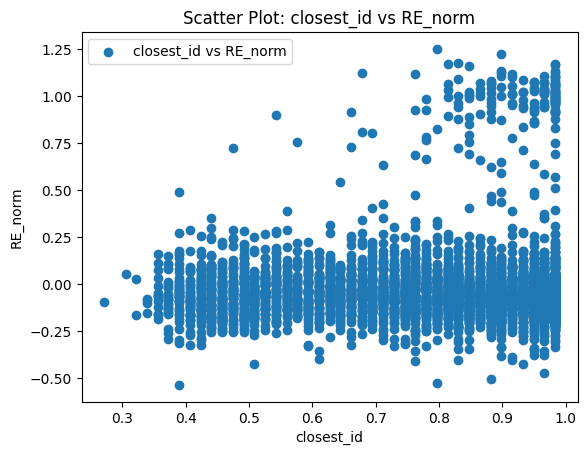

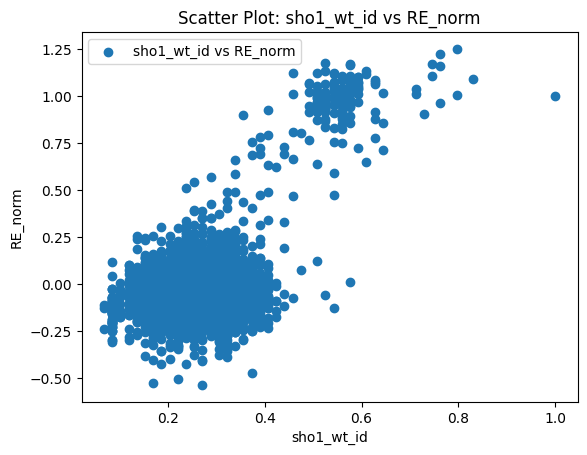

In [25]:
closest_id = merged_df['closest_id']
sho1_wt_id = merged_df['sho1_wt_id']
RE_norm = merged_df['RE_norm']

# Plot closest_id vs RE_norm
plt.scatter(closest_id, RE_norm, label='closest_id vs RE_norm')
plt.xlabel('closest_id')
plt.ylabel('RE_norm')
plt.title('Scatter Plot: closest_id vs RE_norm')
plt.legend()
plt.show()

# Plot sho1_wt_id vs RE_norm
plt.scatter(sho1_wt_id, RE_norm, label='sho1_wt_id vs RE_norm')
plt.xlabel('sho1_wt_id')
plt.ylabel('RE_norm')
plt.title('Scatter Plot: sho1_wt_id vs RE_norm')
plt.legend()
plt.show()


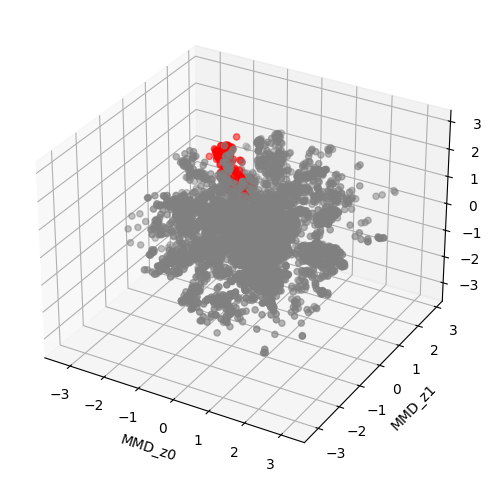

In [24]:
## sanity check

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assume you have a pandas DataFrame "merged_df"
# merged_df = ...

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create color labels based on the condition
colors = ['red' if og=='NOG09120' else 'gray' for og in merged_df['orthologous_group']]

ax.scatter(merged_df['MMD_z0'], merged_df['MMD_z1'], merged_df['MMD_z2'], c=colors)

ax.set_xlabel('MMD_z0')
ax.set_ylabel('MMD_z1')
ax.set_zlabel('MMD_z2')

plt.show()